#  딥러닝(Deep Learning) FNN (forword neural networks) with Keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

## 회귀분석 (Regression Analysis)

### 데이터 셋 준비하기 boston houring data

In [98]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

C:\Users\jwyoon\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

In [99]:
X.shape

(506, 13)

In [100]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [101]:
y.shape

(506,)

In [102]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [103]:
print(X.mean(axis=0))

[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01]


In [104]:
print(y.mean(), y.var(), y.std()) #의미가 없는 값 mse에서 mean>var보다 클때

22.532806324110677 84.41955615616556 9.188011545278203


#### Feature Data Scale 정규화 하기

In [105]:
from sklearn.preprocessing import StandardScaler
#정규화
#x-standard/시그마

In [106]:
X_scaled = StandardScaler().fit_transform(X)

In [107]:
X_scaled[:3]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ]])

#### split training and test datasets

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [110]:
print(X_train.shape, y_train.shape)

(379, 13) (379,)


In [111]:
print(X_test.shape, y_test.shape)

(127, 13) (127,)


In [112]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y)
#스케일도 알아볼려고 추가해줌

### Scikit-Learn의 Regression을 이용한 예측

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

#### Feature matrix scale을 변환하기 않은 경우

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
model.score(X_train, y_train)

0.0464929013975367

In [21]:
y_pred = model.predict(X_train)

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
mean_squared_error(y_pred, y_train)
#아무런 의미가 없다 80이상

81.90435622085631

In [24]:
y_pred = model.predict(X_test)

In [25]:
mean_squared_error(y_pred, y_test)
#아무런 설명력이 없다.

85.09807369212692

#### Feature matrix의 scale을 정규한 경우

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_scaled_train, y_train)

LinearRegression()

In [28]:
model.score(X_scaled_train, y_train)
#오차 70%

0.7675026084740871

In [29]:
y_pred = model.predict(X_scaled_train)

In [30]:
mean_squared_error(y_pred,y_train)
#학습한 loss값

19.971061782202312

In [31]:
y_pred = model.predict(X_scaled_test)

In [32]:
mean_squared_error(y_pred, y_test)
#테스트 loss값
#train값과 test에 loss 값의 차이가 크다. 따라서 overfitting

31.121841981734747

### Keras를 이용한 FNN 모델 구축

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

#### FNN Model의 구성

In [34]:
model = Sequential()
#add로 layer를 추가(쌓이는 방식)
model.add(Dense(units=1,input_dim=X_test.shape[1], activation='linear' ))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


#### training the model : 손실함수 및 학습 알고리즘 지정

In [35]:
optimizer = Adam()
model.compile(optimizer=Adam(), loss='mse')

In [36]:
hist = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
12/12 [==============================] - 1s 3ms/step - loss: 29508.0918
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 26426.5410
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 23618.8633
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 21178.8340
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 18999.7969
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 17099.2305
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 15527.6152
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 14132.8750
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 12964.1348
Epoch 10/500
12/12 [==============================] - 0s 1ms/step - loss: 11999.6885
Epoch 11/500
12/12 [==============================] - 0s 2ms/step - loss: 11138.2520
Epoch 12/500
12/12 [==============================] - 0s 2ms/step - loss: 

12/12 [==============================] - 0s 1ms/step - loss: 888.1620
Epoch 99/500
12/12 [==============================] - 0s 2ms/step - loss: 862.7292
Epoch 100/500
12/12 [==============================] - 0s 2ms/step - loss: 838.6654
Epoch 101/500
12/12 [==============================] - 0s 1ms/step - loss: 813.9769
Epoch 102/500
12/12 [==============================] - 0s 1ms/step - loss: 791.0483
Epoch 103/500
12/12 [==============================] - 0s 1ms/step - loss: 768.2569
Epoch 104/500
12/12 [==============================] - 0s 1ms/step - loss: 746.4140
Epoch 105/500
12/12 [==============================] - 0s 1ms/step - loss: 725.9764
Epoch 106/500
12/12 [==============================] - 0s 2ms/step - loss: 705.5825
Epoch 107/500
12/12 [==============================] - 0s 1ms/step - loss: 685.6253
Epoch 108/500
12/12 [==============================] - 0s 1ms/step - loss: 666.5131
Epoch 109/500
12/12 [==============================] - 0s 1ms/step - loss: 647.7724
Epoch 1

12/12 [==============================] - 0s 1ms/step - loss: 129.5525
Epoch 196/500
12/12 [==============================] - 0s 2ms/step - loss: 128.6073
Epoch 197/500
12/12 [==============================] - 0s 2ms/step - loss: 127.6834
Epoch 198/500
12/12 [==============================] - 0s 1ms/step - loss: 126.7604
Epoch 199/500
12/12 [==============================] - 0s 1ms/step - loss: 125.9633
Epoch 200/500
12/12 [==============================] - 0s 1ms/step - loss: 125.2034
Epoch 201/500
12/12 [==============================] - 0s 1ms/step - loss: 124.2904
Epoch 202/500
12/12 [==============================] - 0s 1ms/step - loss: 123.6204
Epoch 203/500
12/12 [==============================] - 0s 2ms/step - loss: 122.8650
Epoch 204/500
12/12 [==============================] - 0s 1ms/step - loss: 122.2866
Epoch 205/500
12/12 [==============================] - 0s 1ms/step - loss: 121.5629
Epoch 206/500
12/12 [==============================] - 0s 1ms/step - loss: 120.7878
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 102.6889
Epoch 293/500
12/12 [==============================] - 0s 2ms/step - loss: 102.5986
Epoch 294/500
12/12 [==============================] - 0s 2ms/step - loss: 102.5205
Epoch 295/500
12/12 [==============================] - 0s 1ms/step - loss: 102.3905
Epoch 296/500
12/12 [==============================] - 0s 1ms/step - loss: 102.3175
Epoch 297/500
12/12 [==============================] - 0s 1ms/step - loss: 102.3201
Epoch 298/500
12/12 [==============================] - 0s 1ms/step - loss: 102.3905
Epoch 299/500
12/12 [==============================] - 0s 2ms/step - loss: 102.1633
Epoch 300/500
12/12 [==============================] - 0s 1ms/step - loss: 102.0495
Epoch 301/500
12/12 [==============================] - 0s 2ms/step - loss: 101.9739
Epoch 302/500
12/12 [==============================] - 0s 1ms/step - loss: 101.9991
Epoch 303/500
12/12 [==============================] - 0s 1ms/step - loss: 101.8344
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 96.6416
Epoch 391/500
12/12 [==============================] - 0s 2ms/step - loss: 96.4473
Epoch 392/500
12/12 [==============================] - 0s 2ms/step - loss: 96.5311
Epoch 393/500
12/12 [==============================] - 0s 1ms/step - loss: 96.5050
Epoch 394/500
12/12 [==============================] - 0s 1ms/step - loss: 96.3093
Epoch 395/500
12/12 [==============================] - 0s 1ms/step - loss: 96.9507
Epoch 396/500
12/12 [==============================] - 0s 2ms/step - loss: 96.2741
Epoch 397/500
12/12 [==============================] - 0s 2ms/step - loss: 96.8511
Epoch 398/500
12/12 [==============================] - 0s 1ms/step - loss: 97.5170
Epoch 399/500
12/12 [==============================] - 0s 1ms/step - loss: 97.3320
Epoch 400/500
12/12 [==============================] - 0s 1ms/step - loss: 96.5083
Epoch 401/500
12/12 [==============================] - 0s 2ms/step - loss: 95.9194
Epoch 402/500
12/1

12/12 [==============================] - 0s 2ms/step - loss: 92.1234
Epoch 489/500
12/12 [==============================] - 0s 2ms/step - loss: 91.7418
Epoch 490/500
12/12 [==============================] - 0s 2ms/step - loss: 91.7272
Epoch 491/500
12/12 [==============================] - 0s 2ms/step - loss: 92.6366
Epoch 492/500
12/12 [==============================] - 0s 2ms/step - loss: 91.4209
Epoch 493/500
12/12 [==============================] - 0s 1ms/step - loss: 91.8133
Epoch 494/500
12/12 [==============================] - 0s 2ms/step - loss: 91.8503
Epoch 495/500
12/12 [==============================] - 0s 2ms/step - loss: 91.7700
Epoch 496/500
12/12 [==============================] - 0s 1ms/step - loss: 91.8431
Epoch 497/500
12/12 [==============================] - 0s 1ms/step - loss: 91.5420
Epoch 498/500
12/12 [==============================] - 0s 1ms/step - loss: 91.4958
Epoch 499/500
12/12 [==============================] - 0s 2ms/step - loss: 91.9864
Epoch 500/500
12/1

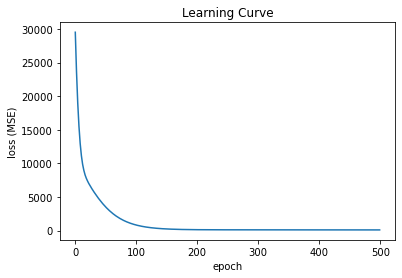

In [37]:
plt.plot(hist.history['loss'])
plt.title("Learning Curve")
plt.xlabel("epoch")
plt.ylabel("loss (MSE)")
plt.show()

#### 신경망 성능의 추정 (훈련 데이터)

In [38]:
y_train_pred = model.predict(X_train)

12/12 [==============================] - 0s 1ms/step


In [39]:
y_train_pred.shape

(379, 1)

In [40]:
y_train_pred = y_train_pred.reshape(379)

Text(0.5, 1.0, 'comparison of y_train vs y_train_pred')

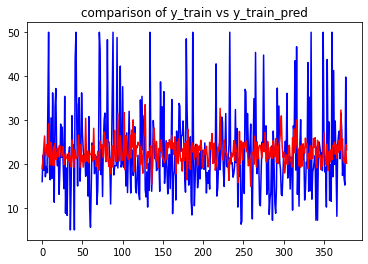

In [41]:
plt.plot(y_train, label="y_train", color="blue")
plt.plot(y_train_pred, label="y_train_pred", color="red")
plt.title("comparison of y_train vs y_train_pred")

#실제 결과 출력

In [42]:
mean_squared_error(y_train, y_train_pred)

91.26495361680205

#### 성능평가 (test dataset)

In [43]:
y_test_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [44]:
y_test_pred.shape

(127, 1)

In [45]:
y_test_pred = y_test_pred.reshape(127)

Text(0.5, 1.0, 'comparison of y_test vs y_test_pred')

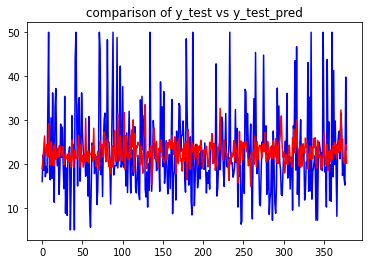

In [46]:
plt.plot(y_train, label="y_test", color="blue")
plt.plot(y_train_pred, label="y_test_pred", color="red")
plt.title("comparison of y_test vs y_test_pred")

In [47]:
mean_squared_error(y_test, y_test_pred)

85.10610931262624

### FNN에서 은닉층을 증가함

In [48]:
model = Sequential()
model.add(Dense(10,input_dim=X_test.shape[1], activation='tanh' ))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                140       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer = Adam(), loss='mse')

In [50]:
hist = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
12/12 [==============================] - 1s 3ms/step - loss: 612.3207
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 586.7864
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 564.3799
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 544.4003
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 526.1360
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 508.6660
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 492.9985
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 478.2912
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 465.0731
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 452.7496
Epoch 11/500
12/12 [==============================] - 0s 2ms/step - loss: 441.6877
Epoch 12/500
12/12 [==============================] - 0s 2ms/step - loss: 431.3825
Epoch 13/500


12/12 [==============================] - 0s 2ms/step - loss: 145.8071
Epoch 100/500
12/12 [==============================] - 0s 2ms/step - loss: 144.4723
Epoch 101/500
12/12 [==============================] - 0s 2ms/step - loss: 143.1595
Epoch 102/500
12/12 [==============================] - 0s 2ms/step - loss: 141.8833
Epoch 103/500
12/12 [==============================] - 0s 2ms/step - loss: 140.5965
Epoch 104/500
12/12 [==============================] - 0s 1ms/step - loss: 139.3628
Epoch 105/500
12/12 [==============================] - 0s 2ms/step - loss: 138.1388
Epoch 106/500
12/12 [==============================] - 0s 2ms/step - loss: 136.9266
Epoch 107/500
12/12 [==============================] - 0s 2ms/step - loss: 135.7853
Epoch 108/500
12/12 [==============================] - 0s 2ms/step - loss: 134.6108
Epoch 109/500
12/12 [==============================] - 0s 3ms/step - loss: 133.4490
Epoch 110/500
12/12 [==============================] - 0s 3ms/step - loss: 132.3533
Epoch 

12/12 [==============================] - 0s 3ms/step - loss: 89.2098
Epoch 198/500
12/12 [==============================] - 0s 3ms/step - loss: 89.0740
Epoch 199/500
12/12 [==============================] - 0s 3ms/step - loss: 88.9559
Epoch 200/500
12/12 [==============================] - 0s 3ms/step - loss: 88.8515
Epoch 201/500
12/12 [==============================] - 0s 2ms/step - loss: 88.7432
Epoch 202/500
12/12 [==============================] - 0s 1ms/step - loss: 88.6139
Epoch 203/500
12/12 [==============================] - 0s 2ms/step - loss: 88.5104
Epoch 204/500
12/12 [==============================] - 0s 2ms/step - loss: 88.4036
Epoch 205/500
12/12 [==============================] - 0s 2ms/step - loss: 88.3186
Epoch 206/500
12/12 [==============================] - 0s 2ms/step - loss: 88.2095
Epoch 207/500
12/12 [==============================] - 0s 1ms/step - loss: 88.1262
Epoch 208/500
12/12 [==============================] - 0s 2ms/step - loss: 88.0314
Epoch 209/500
12/1

12/12 [==============================] - 0s 2ms/step - loss: 85.9177
Epoch 296/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9180
Epoch 297/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9161
Epoch 298/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9164
Epoch 299/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9182
Epoch 300/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9132
Epoch 301/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9133
Epoch 302/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9111
Epoch 303/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9111
Epoch 304/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9137
Epoch 305/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9094
Epoch 306/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9100
Epoch 307/500
12/1

12/12 [==============================] - 0s 2ms/step - loss: 85.9015
Epoch 394/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9029
Epoch 395/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9023
Epoch 396/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9000
Epoch 397/500
12/12 [==============================] - 0s 2ms/step - loss: 85.8999
Epoch 398/500
12/12 [==============================] - 0s 1ms/step - loss: 85.9010
Epoch 399/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9021
Epoch 400/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9048
Epoch 401/500
12/12 [==============================] - 0s 1ms/step - loss: 85.9009
Epoch 402/500
12/12 [==============================] - 0s 1ms/step - loss: 85.8999
Epoch 403/500
12/12 [==============================] - 0s 2ms/step - loss: 85.8993
Epoch 404/500
12/12 [==============================] - 0s 1ms/step - loss: 85.8995
Epoch 405/500
12/1

12/12 [==============================] - 0s 2ms/step - loss: 85.9044
Epoch 492/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9007
Epoch 493/500
12/12 [==============================] - 0s 2ms/step - loss: 85.8999
Epoch 494/500
12/12 [==============================] - 0s 3ms/step - loss: 85.8996
Epoch 495/500
12/12 [==============================] - 0s 3ms/step - loss: 85.9005
Epoch 496/500
12/12 [==============================] - 0s 3ms/step - loss: 85.9007
Epoch 497/500
12/12 [==============================] - 0s 3ms/step - loss: 85.9030
Epoch 498/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9046
Epoch 499/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9039
Epoch 500/500
12/12 [==============================] - 0s 2ms/step - loss: 85.9029


In [51]:
y_train_pred = model.predict(X_train)

12/12 [==============================] - 0s 2ms/step


In [52]:
mean_squared_error(y_train, y_train_pred)

85.89820929624811

In [53]:
y_test_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [54]:
mean_squared_error(y_test, y_test_pred)

80.00856547103069

### data의 scale를 정규화한 경우

In [55]:
model = Sequential()
model.add(Dense(units=1,input_dim=X_scaled_train.shape[1], activation='linear' ))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer = Adam(), loss = "mse")

In [57]:
model.fit(X_scaled_train, y_train, epochs=500)

Epoch 1/500
12/12 [==============================] - 0s 3ms/step - loss: 611.3566
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 609.5286
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 607.6456
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 605.6848
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 603.9878
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 602.0590
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 600.3262
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 598.5461
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 596.7170
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 595.0030
Epoch 11/500
12/12 [==============================] - 0s 2ms/step - loss: 593.3408
Epoch 12/500
12/12 [==============================] - 0s 2ms/step - loss: 591.6379
Epoch 13/500


12/12 [==============================] - 0s 3ms/step - loss: 497.0103
Epoch 100/500
12/12 [==============================] - 0s 3ms/step - loss: 496.2795
Epoch 101/500
12/12 [==============================] - 0s 2ms/step - loss: 495.5893
Epoch 102/500
12/12 [==============================] - 0s 2ms/step - loss: 494.8287
Epoch 103/500
12/12 [==============================] - 0s 2ms/step - loss: 494.1102
Epoch 104/500
12/12 [==============================] - 0s 2ms/step - loss: 493.4510
Epoch 105/500
12/12 [==============================] - 0s 2ms/step - loss: 492.7166
Epoch 106/500
12/12 [==============================] - 0s 2ms/step - loss: 492.0438
Epoch 107/500
12/12 [==============================] - 0s 2ms/step - loss: 491.3393
Epoch 108/500
12/12 [==============================] - 0s 2ms/step - loss: 490.6454
Epoch 109/500
12/12 [==============================] - 0s 2ms/step - loss: 489.9551
Epoch 110/500
12/12 [==============================] - 0s 2ms/step - loss: 489.2716
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 438.4307
Epoch 197/500
12/12 [==============================] - 0s 2ms/step - loss: 437.8883
Epoch 198/500
12/12 [==============================] - 0s 2ms/step - loss: 437.3597
Epoch 199/500
12/12 [==============================] - 0s 2ms/step - loss: 436.8094
Epoch 200/500
12/12 [==============================] - 0s 2ms/step - loss: 436.2803
Epoch 201/500
12/12 [==============================] - 0s 2ms/step - loss: 435.7484
Epoch 202/500
12/12 [==============================] - 0s 2ms/step - loss: 435.2222
Epoch 203/500
12/12 [==============================] - 0s 2ms/step - loss: 434.6864
Epoch 204/500
12/12 [==============================] - 0s 2ms/step - loss: 434.1501
Epoch 205/500
12/12 [==============================] - 0s 1ms/step - loss: 433.6249
Epoch 206/500
12/12 [==============================] - 0s 2ms/step - loss: 433.0919
Epoch 207/500
12/12 [==============================] - 0s 2ms/step - loss: 432.5742
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 389.2874
Epoch 294/500
12/12 [==============================] - 0s 1ms/step - loss: 388.8027
Epoch 295/500
12/12 [==============================] - 0s 1ms/step - loss: 388.3413
Epoch 296/500
12/12 [==============================] - 0s 1ms/step - loss: 387.8559
Epoch 297/500
12/12 [==============================] - 0s 1ms/step - loss: 387.3673
Epoch 298/500
12/12 [==============================] - 0s 1ms/step - loss: 386.8958
Epoch 299/500
12/12 [==============================] - 0s 1ms/step - loss: 386.4159
Epoch 300/500
12/12 [==============================] - 0s 1ms/step - loss: 385.9491
Epoch 301/500
12/12 [==============================] - 0s 1ms/step - loss: 385.4679
Epoch 302/500
12/12 [==============================] - 0s 1ms/step - loss: 384.9828
Epoch 303/500
12/12 [==============================] - 0s 1ms/step - loss: 384.5237
Epoch 304/500
12/12 [==============================] - 0s 1ms/step - loss: 384.0341
Epoch 

12/12 [==============================] - 0s 1ms/step - loss: 344.9375
Epoch 391/500
12/12 [==============================] - 0s 1ms/step - loss: 344.4869
Epoch 392/500
12/12 [==============================] - 0s 1ms/step - loss: 344.0472
Epoch 393/500
12/12 [==============================] - 0s 1ms/step - loss: 343.6201
Epoch 394/500
12/12 [==============================] - 0s 1ms/step - loss: 343.1805
Epoch 395/500
12/12 [==============================] - 0s 1ms/step - loss: 342.7479
Epoch 396/500
12/12 [==============================] - 0s 1ms/step - loss: 342.3211
Epoch 397/500
12/12 [==============================] - 0s 1ms/step - loss: 341.8775
Epoch 398/500
12/12 [==============================] - 0s 1ms/step - loss: 341.4534
Epoch 399/500
12/12 [==============================] - 0s 1ms/step - loss: 341.0214
Epoch 400/500
12/12 [==============================] - 0s 1ms/step - loss: 340.5815
Epoch 401/500
12/12 [==============================] - 0s 1ms/step - loss: 340.1553
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 304.5336
Epoch 488/500
12/12 [==============================] - 0s 2ms/step - loss: 304.1469
Epoch 489/500
12/12 [==============================] - 0s 3ms/step - loss: 303.7434
Epoch 490/500
12/12 [==============================] - 0s 2ms/step - loss: 303.3425
Epoch 491/500
12/12 [==============================] - 0s 2ms/step - loss: 302.9608
Epoch 492/500
12/12 [==============================] - 0s 2ms/step - loss: 302.5627
Epoch 493/500
12/12 [==============================] - 0s 1ms/step - loss: 302.1478
Epoch 494/500
12/12 [==============================] - 0s 2ms/step - loss: 301.7742
Epoch 495/500
12/12 [==============================] - 0s 2ms/step - loss: 301.3632
Epoch 496/500
12/12 [==============================] - 0s 1ms/step - loss: 300.9830
Epoch 497/500
12/12 [==============================] - 0s 1ms/step - loss: 300.5754
Epoch 498/500
12/12 [==============================] - 0s 1ms/step - loss: 300.1837
Epoch 

In [58]:
y_train_pred = model.predict(X_scaled_train)
#퍼포먼스 비교 base하고 train

12/12 [==============================] - 0s 2ms/step


In [59]:
mean_squared_error(y_train, y_train_pred)

299.17233343114344

In [60]:
y_test_pred = model.predict(X_scaled_test)

4/4 [==============================] - 0s 2ms/step


In [61]:
mean_squared_error(y_test, y_test_pred)

343.9894016540594

In [63]:
model.compile(optimizer=Adam(), loss = "mse")
model.fit(X_scaled_train, y_train, epochs=3000)

Epoch 1/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9841
Epoch 2/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9816
Epoch 3/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9812
Epoch 4/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9805
Epoch 5/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9798
Epoch 6/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9779
Epoch 7/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9771
Epoch 8/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9776
Epoch 9/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9805
Epoch 10/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9775
Epoch 11/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9774
Epoch 12/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9784
Epoch 13/3000

12/12 [==============================] - 0s 2ms/step - loss: 19.9800
Epoch 100/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9774
Epoch 101/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9787
Epoch 102/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9772
Epoch 103/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9781
Epoch 104/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9840
Epoch 105/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9801
Epoch 106/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9772
Epoch 107/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9768
Epoch 108/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9784
Epoch 109/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9773
Epoch 110/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9771
Epoch 1

12/12 [==============================] - 0s 1ms/step - loss: 19.9760
Epoch 197/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9762
Epoch 198/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9766
Epoch 199/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9759
Epoch 200/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9767
Epoch 201/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9767
Epoch 202/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9768
Epoch 203/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9758
Epoch 204/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9758
Epoch 205/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9775
Epoch 206/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9773
Epoch 207/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9794
Epoch 2

12/12 [==============================] - 0s 1ms/step - loss: 19.9761
Epoch 294/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9760
Epoch 295/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9774
Epoch 296/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9754
Epoch 297/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9787
Epoch 298/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9794
Epoch 299/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9797
Epoch 300/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9761
Epoch 301/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9755
Epoch 302/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9793
Epoch 303/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9768
Epoch 304/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9754
Epoch 3

12/12 [==============================] - 0s 1ms/step - loss: 19.9790
Epoch 391/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9765
Epoch 392/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9759
Epoch 393/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9787
Epoch 394/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9739
Epoch 395/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9762
Epoch 396/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9810
Epoch 397/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9793
Epoch 398/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9762
Epoch 399/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9745
Epoch 400/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9774
Epoch 401/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9766
Epoch 4

12/12 [==============================] - 0s 2ms/step - loss: 19.9750
Epoch 488/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9761
Epoch 489/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9772
Epoch 490/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9745
Epoch 491/3000
12/12 [==============================] - 0s 3ms/step - loss: 19.9753
Epoch 492/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9767
Epoch 493/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9793
Epoch 494/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9752
Epoch 495/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9754
Epoch 496/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9763
Epoch 497/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9760
Epoch 498/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9766
Epoch 4

12/12 [==============================] - 0s 2ms/step - loss: 19.9763
Epoch 585/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9759
Epoch 586/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9758
Epoch 587/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9761
Epoch 588/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9751
Epoch 589/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9754
Epoch 590/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9758
Epoch 591/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9766
Epoch 592/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9741
Epoch 593/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9751
Epoch 594/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9758
Epoch 595/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9809
Epoch 5

12/12 [==============================] - 0s 1ms/step - loss: 19.9781
Epoch 682/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9759
Epoch 683/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9753
Epoch 684/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9766
Epoch 685/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9777
Epoch 686/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9783
Epoch 687/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9738
Epoch 688/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9756
Epoch 689/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9748
Epoch 690/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9757
Epoch 691/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9753
Epoch 692/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9752
Epoch 6

12/12 [==============================] - 0s 2ms/step - loss: 19.9749
Epoch 779/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9789
Epoch 780/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9740
Epoch 781/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9741
Epoch 782/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9766
Epoch 783/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9760
Epoch 784/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9753
Epoch 785/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9781
Epoch 786/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9749
Epoch 787/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9750
Epoch 788/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9753
Epoch 789/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9745
Epoch 7

12/12 [==============================] - 0s 2ms/step - loss: 19.9761
Epoch 876/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9742
Epoch 877/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9750
Epoch 878/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9755
Epoch 879/3000
12/12 [==============================] - 0s 3ms/step - loss: 19.9740
Epoch 880/3000
12/12 [==============================] - 0s 3ms/step - loss: 19.9759
Epoch 881/3000
12/12 [==============================] - 0s 3ms/step - loss: 19.9745
Epoch 882/3000
12/12 [==============================] - 0s 3ms/step - loss: 19.9743
Epoch 883/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9772
Epoch 884/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9770
Epoch 885/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9743
Epoch 886/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9768
Epoch 8

12/12 [==============================] - 0s 1ms/step - loss: 19.9770
Epoch 973/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9775
Epoch 974/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9746
Epoch 975/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9762
Epoch 976/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9761
Epoch 977/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9737
Epoch 978/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9761
Epoch 979/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9746
Epoch 980/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9747
Epoch 981/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9766
Epoch 982/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9747
Epoch 983/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9738
Epoch 9

12/12 [==============================] - 0s 2ms/step - loss: 19.9761
Epoch 1069/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9762
Epoch 1070/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9774
Epoch 1071/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9750
Epoch 1072/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9754
Epoch 1073/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9750
Epoch 1074/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9803
Epoch 1075/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9746
Epoch 1076/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9757
Epoch 1077/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9757
Epoch 1078/3000
12/12 [==============================] - 0s 3ms/step - loss: 19.9753
Epoch 1079/3000
12/12 [==============================] - 0s 3ms/step - loss: 19.9

12/12 [==============================] - 0s 2ms/step - loss: 19.9759
Epoch 1165/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9759
Epoch 1166/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9771
Epoch 1167/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9744
Epoch 1168/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9747
Epoch 1169/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9764
Epoch 1170/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9757
Epoch 1171/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9749
Epoch 1172/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9747
Epoch 1173/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9751
Epoch 1174/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9761
Epoch 1175/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9

12/12 [==============================] - 0s 2ms/step - loss: 19.9779
Epoch 1261/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9737
Epoch 1262/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9738
Epoch 1263/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9755
Epoch 1264/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9745
Epoch 1265/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9756
Epoch 1266/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9759
Epoch 1267/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9751
Epoch 1268/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9733
Epoch 1269/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9742
Epoch 1270/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9759
Epoch 1271/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9

12/12 [==============================] - 0s 1ms/step - loss: 19.9746
Epoch 1357/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9734
Epoch 1358/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9807
Epoch 1359/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9741
Epoch 1360/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9742
Epoch 1361/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9739
Epoch 1362/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9758
Epoch 1363/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9730
Epoch 1364/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9751
Epoch 1365/3000
12/12 [==============================] - 0s 3ms/step - loss: 19.9755
Epoch 1366/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9747
Epoch 1367/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9

12/12 [==============================] - 0s 2ms/step - loss: 19.9739
Epoch 1453/3000
12/12 [==============================] - 0s 3ms/step - loss: 19.9771
Epoch 1454/3000
12/12 [==============================] - 0s 3ms/step - loss: 19.9746
Epoch 1455/3000
12/12 [==============================] - 0s 3ms/step - loss: 19.9787
Epoch 1456/3000
12/12 [==============================] - 0s 3ms/step - loss: 19.9752
Epoch 1457/3000
12/12 [==============================] - 0s 3ms/step - loss: 19.9769
Epoch 1458/3000
12/12 [==============================] - 0s 3ms/step - loss: 19.9760
Epoch 1459/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9750
Epoch 1460/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9755
Epoch 1461/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9744
Epoch 1462/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9744
Epoch 1463/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9

12/12 [==============================] - 0s 1ms/step - loss: 19.9739
Epoch 1549/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9741
Epoch 1550/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9745
Epoch 1551/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9740
Epoch 1552/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9744
Epoch 1553/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9740
Epoch 1554/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9764
Epoch 1555/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9770
Epoch 1556/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9740
Epoch 1557/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9752
Epoch 1558/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9769
Epoch 1559/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9

12/12 [==============================] - 0s 1ms/step - loss: 19.9742
Epoch 1645/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9766
Epoch 1646/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9762
Epoch 1647/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9728
Epoch 1648/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9762
Epoch 1649/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9748
Epoch 1650/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9747
Epoch 1651/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9745
Epoch 1652/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9759
Epoch 1653/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9750
Epoch 1654/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9738
Epoch 1655/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9

12/12 [==============================] - 0s 1ms/step - loss: 19.9751
Epoch 1741/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9784
Epoch 1742/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9745
Epoch 1743/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9735
Epoch 1744/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9740
Epoch 1745/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9737
Epoch 1746/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9776
Epoch 1747/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9740
Epoch 1748/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9738
Epoch 1749/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9735
Epoch 1750/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9768
Epoch 1751/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9

12/12 [==============================] - 0s 1ms/step - loss: 19.9746
Epoch 1837/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9746
Epoch 1838/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9748
Epoch 1839/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9766
Epoch 1840/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9781
Epoch 1841/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9738
Epoch 1842/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9740
Epoch 1843/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9778
Epoch 1844/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9737
Epoch 1845/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9738
Epoch 1846/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9757
Epoch 1847/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9

12/12 [==============================] - 0s 2ms/step - loss: 19.9748
Epoch 1933/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9752
Epoch 1934/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9735
Epoch 1935/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9763
Epoch 1936/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9741
Epoch 1937/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9740
Epoch 1938/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9753
Epoch 1939/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9743
Epoch 1940/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9758
Epoch 1941/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9743
Epoch 1942/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9768
Epoch 1943/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9

12/12 [==============================] - 0s 1ms/step - loss: 19.9756
Epoch 2029/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9779
Epoch 2030/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9746
Epoch 2031/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9761
Epoch 2032/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9736
Epoch 2033/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9757
Epoch 2034/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9777
Epoch 2035/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9755
Epoch 2036/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9737
Epoch 2037/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9748
Epoch 2038/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9739
Epoch 2039/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9

12/12 [==============================] - 0s 1ms/step - loss: 19.9733
Epoch 2125/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9750
Epoch 2126/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9752
Epoch 2127/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9805
Epoch 2128/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9784
Epoch 2129/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9764
Epoch 2130/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9772
Epoch 2131/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9748
Epoch 2132/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9760
Epoch 2133/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9750
Epoch 2134/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9752
Epoch 2135/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9

12/12 [==============================] - 0s 1ms/step - loss: 19.9735
Epoch 2221/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9754
Epoch 2222/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9748
Epoch 2223/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9800
Epoch 2224/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9754
Epoch 2225/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9733
Epoch 2226/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9773
Epoch 2227/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9736
Epoch 2228/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9751
Epoch 2229/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9742
Epoch 2230/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9740
Epoch 2231/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9

12/12 [==============================] - 0s 1ms/step - loss: 19.9790
Epoch 2317/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9741
Epoch 2318/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9741
Epoch 2319/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9741
Epoch 2320/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9790
Epoch 2321/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9765
Epoch 2322/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9806
Epoch 2323/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9763
Epoch 2324/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9736
Epoch 2325/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9731
Epoch 2326/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9809
Epoch 2327/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9

12/12 [==============================] - 0s 2ms/step - loss: 19.9750
Epoch 2413/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9739
Epoch 2414/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9734
Epoch 2415/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9763
Epoch 2416/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9744
Epoch 2417/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9738
Epoch 2418/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9749
Epoch 2419/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9756
Epoch 2420/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9725
Epoch 2421/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9736
Epoch 2422/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9742
Epoch 2423/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9

12/12 [==============================] - 0s 1ms/step - loss: 19.9752
Epoch 2509/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9746
Epoch 2510/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9755
Epoch 2511/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9730
Epoch 2512/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9731
Epoch 2513/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9743
Epoch 2514/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9743
Epoch 2515/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9752
Epoch 2516/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9780
Epoch 2517/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9741
Epoch 2518/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9755
Epoch 2519/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9

12/12 [==============================] - 0s 1ms/step - loss: 19.9747
Epoch 2605/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9740
Epoch 2606/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9741
Epoch 2607/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9732
Epoch 2608/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9733
Epoch 2609/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9758
Epoch 2610/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9766
Epoch 2611/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9745
Epoch 2612/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9737
Epoch 2613/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9756
Epoch 2614/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9746
Epoch 2615/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9

12/12 [==============================] - 0s 2ms/step - loss: 19.9737
Epoch 2701/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9731
Epoch 2702/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9742
Epoch 2703/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9747
Epoch 2704/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9739
Epoch 2705/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9743
Epoch 2706/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9824
Epoch 2707/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9759
Epoch 2708/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9746
Epoch 2709/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9740
Epoch 2710/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9736
Epoch 2711/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9

12/12 [==============================] - 0s 1ms/step - loss: 19.9737
Epoch 2797/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9739
Epoch 2798/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9751
Epoch 2799/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9734
Epoch 2800/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9755
Epoch 2801/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9743
Epoch 2802/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9740
Epoch 2803/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9764
Epoch 2804/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9746
Epoch 2805/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9738
Epoch 2806/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9746
Epoch 2807/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9

12/12 [==============================] - 0s 2ms/step - loss: 19.9748
Epoch 2893/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9737
Epoch 2894/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9754
Epoch 2895/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9762
Epoch 2896/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9753
Epoch 2897/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9746
Epoch 2898/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9738
Epoch 2899/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9733
Epoch 2900/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9737
Epoch 2901/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9743
Epoch 2902/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9736
Epoch 2903/3000
12/12 [==============================] - 0s 2ms/step - loss: 19.9

12/12 [==============================] - 0s 2ms/step - loss: 19.9743
Epoch 2989/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9740
Epoch 2990/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9732
Epoch 2991/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9761
Epoch 2992/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9729
Epoch 2993/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9747
Epoch 2994/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9738
Epoch 2995/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9752
Epoch 2996/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9758
Epoch 2997/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9785
Epoch 2998/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9757
Epoch 2999/3000
12/12 [==============================] - 0s 1ms/step - loss: 19.9

In [64]:
y_train_pred = model.predict(X_scaled_train)

12/12 [==============================] - 0s 2ms/step


In [65]:
mean_squared_error(y_train, y_train_pred)

19.971107698932286

In [66]:
model.evaluate(X_scaled_train, y_train)

12/12 [==============================] - 0s 2ms/step - loss: 19.9711


19.971107482910156

In [67]:
model.evaluate(X_scaled_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 31.1295


31.129507064819336

#### 은닉층을 늘려서 사용하는 경우

In [68]:
model = Sequential()
model.add(Dense(10,input_dim=X_test.shape[1], activation='tanh' ))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                140       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(optimizer = Adam(), loss = 'mse')
model.fit(X_scaled_train, y_train, epochs=1000)

Epoch 1/3000
12/12 [==============================] - 1s 2ms/step - loss: 590.5413
Epoch 2/3000
12/12 [==============================] - 0s 2ms/step - loss: 581.3109
Epoch 3/3000
12/12 [==============================] - 0s 2ms/step - loss: 572.5073
Epoch 4/3000
12/12 [==============================] - 0s 2ms/step - loss: 562.8828
Epoch 5/3000
12/12 [==============================] - 0s 2ms/step - loss: 553.3606
Epoch 6/3000
12/12 [==============================] - 0s 2ms/step - loss: 543.2562
Epoch 7/3000
12/12 [==============================] - 0s 2ms/step - loss: 532.6611
Epoch 8/3000
12/12 [==============================] - 0s 3ms/step - loss: 521.5153
Epoch 9/3000
12/12 [==============================] - 0s 3ms/step - loss: 510.2766
Epoch 10/3000
12/12 [==============================] - 0s 3ms/step - loss: 498.6138
Epoch 11/3000
12/12 [==============================] - 0s 2ms/step - loss: 486.1290
Epoch 12/3000
12/12 [==============================] - 0s 3ms/step - loss: 471.4061
E

12/12 [==============================] - 0s 2ms/step - loss: 133.6945
Epoch 99/3000
12/12 [==============================] - 0s 2ms/step - loss: 132.2808
Epoch 100/3000
12/12 [==============================] - 0s 2ms/step - loss: 130.8347
Epoch 101/3000
12/12 [==============================] - 0s 2ms/step - loss: 129.5398
Epoch 102/3000
12/12 [==============================] - 0s 2ms/step - loss: 128.1440
Epoch 103/3000
12/12 [==============================] - 0s 2ms/step - loss: 126.8231
Epoch 104/3000
12/12 [==============================] - 0s 2ms/step - loss: 125.5559
Epoch 105/3000
12/12 [==============================] - 0s 1ms/step - loss: 124.2255
Epoch 106/3000
12/12 [==============================] - 0s 1ms/step - loss: 123.0604
Epoch 107/3000
12/12 [==============================] - 0s 2ms/step - loss: 121.7572
Epoch 108/3000
12/12 [==============================] - 0s 1ms/step - loss: 120.4907
Epoch 109/3000
12/12 [==============================] - 0s 2ms/step - loss: 119.2

12/12 [==============================] - 0s 2ms/step - loss: 60.7528
Epoch 196/3000
12/12 [==============================] - 0s 1ms/step - loss: 60.4477
Epoch 197/3000
12/12 [==============================] - 0s 2ms/step - loss: 60.0966
Epoch 198/3000
12/12 [==============================] - 0s 2ms/step - loss: 59.7710
Epoch 199/3000
12/12 [==============================] - 0s 2ms/step - loss: 59.4892
Epoch 200/3000
12/12 [==============================] - 0s 2ms/step - loss: 59.2148
Epoch 201/3000
12/12 [==============================] - 0s 2ms/step - loss: 58.8583
Epoch 202/3000
12/12 [==============================] - 0s 2ms/step - loss: 58.6775
Epoch 203/3000
12/12 [==============================] - 0s 2ms/step - loss: 58.3456
Epoch 204/3000
12/12 [==============================] - 0s 2ms/step - loss: 57.9942
Epoch 205/3000
12/12 [==============================] - 0s 2ms/step - loss: 57.6834
Epoch 206/3000
12/12 [==============================] - 0s 2ms/step - loss: 57.3994
Epoch 2

12/12 [==============================] - 0s 2ms/step - loss: 36.3294
Epoch 293/3000
12/12 [==============================] - 0s 2ms/step - loss: 36.0050
Epoch 294/3000
12/12 [==============================] - 0s 2ms/step - loss: 35.6777
Epoch 295/3000
12/12 [==============================] - 0s 3ms/step - loss: 35.3474
Epoch 296/3000
12/12 [==============================] - 0s 3ms/step - loss: 35.0196
Epoch 297/3000
12/12 [==============================] - 0s 2ms/step - loss: 34.6865
Epoch 298/3000
12/12 [==============================] - 0s 2ms/step - loss: 34.4086
Epoch 299/3000
12/12 [==============================] - 0s 2ms/step - loss: 34.1361
Epoch 300/3000
12/12 [==============================] - 0s 2ms/step - loss: 33.9566
Epoch 301/3000
12/12 [==============================] - 0s 2ms/step - loss: 33.7862
Epoch 302/3000
12/12 [==============================] - 0s 2ms/step - loss: 33.4664
Epoch 303/3000
12/12 [==============================] - 0s 2ms/step - loss: 33.2500
Epoch 3

12/12 [==============================] - 0s 2ms/step - loss: 18.9565
Epoch 390/3000
12/12 [==============================] - 0s 2ms/step - loss: 18.8751
Epoch 391/3000
12/12 [==============================] - 0s 2ms/step - loss: 18.7460
Epoch 392/3000
12/12 [==============================] - 0s 2ms/step - loss: 18.6267
Epoch 393/3000
12/12 [==============================] - 0s 2ms/step - loss: 18.5610
Epoch 394/3000
12/12 [==============================] - 0s 2ms/step - loss: 18.4646
Epoch 395/3000
12/12 [==============================] - 0s 2ms/step - loss: 18.3250
Epoch 396/3000
12/12 [==============================] - 0s 2ms/step - loss: 18.2032
Epoch 397/3000
12/12 [==============================] - 0s 2ms/step - loss: 18.1402
Epoch 398/3000
12/12 [==============================] - 0s 2ms/step - loss: 18.0110
Epoch 399/3000
12/12 [==============================] - 0s 2ms/step - loss: 17.9129
Epoch 400/3000
12/12 [==============================] - 0s 1ms/step - loss: 17.7970
Epoch 4

12/12 [==============================] - 0s 2ms/step - loss: 10.6962
Epoch 487/3000
12/12 [==============================] - 0s 2ms/step - loss: 10.5794
Epoch 488/3000
12/12 [==============================] - 0s 1ms/step - loss: 10.5464
Epoch 489/3000
12/12 [==============================] - 0s 2ms/step - loss: 10.5079
Epoch 490/3000
12/12 [==============================] - 0s 2ms/step - loss: 10.4235
Epoch 491/3000
12/12 [==============================] - 0s 2ms/step - loss: 10.3932
Epoch 492/3000
12/12 [==============================] - 0s 2ms/step - loss: 10.3016
Epoch 493/3000
12/12 [==============================] - 0s 2ms/step - loss: 10.2716
Epoch 494/3000
12/12 [==============================] - 0s 2ms/step - loss: 10.1759
Epoch 495/3000
12/12 [==============================] - 0s 2ms/step - loss: 10.2221
Epoch 496/3000
12/12 [==============================] - 0s 2ms/step - loss: 10.1925
Epoch 497/3000
12/12 [==============================] - 0s 2ms/step - loss: 10.0222
Epoch 4

12/12 [==============================] - 0s 2ms/step - loss: 5.7318
Epoch 585/3000
12/12 [==============================] - 0s 2ms/step - loss: 5.6618
Epoch 586/3000
12/12 [==============================] - 0s 2ms/step - loss: 5.6376
Epoch 587/3000
12/12 [==============================] - 0s 2ms/step - loss: 5.5915
Epoch 588/3000
12/12 [==============================] - 0s 2ms/step - loss: 5.6069
Epoch 589/3000
12/12 [==============================] - 0s 2ms/step - loss: 5.6064
Epoch 590/3000
12/12 [==============================] - 0s 2ms/step - loss: 5.6041
Epoch 591/3000
12/12 [==============================] - 0s 2ms/step - loss: 5.5178
Epoch 592/3000
12/12 [==============================] - 0s 2ms/step - loss: 5.4568
Epoch 593/3000
12/12 [==============================] - 0s 1ms/step - loss: 5.3481
Epoch 594/3000
12/12 [==============================] - 0s 1ms/step - loss: 5.3503
Epoch 595/3000
12/12 [==============================] - 0s 2ms/step - loss: 5.2912
Epoch 596/3000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 3.3533
Epoch 683/3000
12/12 [==============================] - 0s 2ms/step - loss: 3.3557
Epoch 684/3000
12/12 [==============================] - 0s 2ms/step - loss: 3.3438
Epoch 685/3000
12/12 [==============================] - 0s 2ms/step - loss: 3.3093
Epoch 686/3000
12/12 [==============================] - 0s 1ms/step - loss: 3.3148
Epoch 687/3000
12/12 [==============================] - 0s 1ms/step - loss: 3.3888
Epoch 688/3000
12/12 [==============================] - 0s 2ms/step - loss: 3.3489
Epoch 689/3000
12/12 [==============================] - 0s 2ms/step - loss: 3.2756
Epoch 690/3000
12/12 [==============================] - 0s 2ms/step - loss: 3.2432
Epoch 691/3000
12/12 [==============================] - 0s 2ms/step - loss: 3.2819
Epoch 692/3000
12/12 [==============================] - 0s 2ms/step - loss: 3.2203
Epoch 693/3000
12/12 [==============================] - 0s 2ms/step - loss: 3.2044
Epoch 694/3000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 2.7053
Epoch 781/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.6679
Epoch 782/3000
12/12 [==============================] - 0s 3ms/step - loss: 2.6497
Epoch 783/3000
12/12 [==============================] - 0s 3ms/step - loss: 2.6917
Epoch 784/3000
12/12 [==============================] - 0s 3ms/step - loss: 2.6929
Epoch 785/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.6923
Epoch 786/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.6662
Epoch 787/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.6434
Epoch 788/3000
12/12 [==============================] - 0s 1ms/step - loss: 2.6575
Epoch 789/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.6372
Epoch 790/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.6086
Epoch 791/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.6017
Epoch 792/3000
12/1

12/12 [==============================] - 0s 3ms/step - loss: 2.3016
Epoch 879/3000
12/12 [==============================] - 0s 1ms/step - loss: 2.3632
Epoch 880/3000
12/12 [==============================] - 0s 1ms/step - loss: 2.3524
Epoch 881/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.3501
Epoch 882/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.2890
Epoch 883/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.3280
Epoch 884/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.3211
Epoch 885/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.3604
Epoch 886/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.3509
Epoch 887/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.3705
Epoch 888/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.2809
Epoch 889/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.2512
Epoch 890/3000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 2.1136
Epoch 977/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.1569
Epoch 978/3000
12/12 [==============================] - 0s 1ms/step - loss: 2.2550
Epoch 979/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.2190
Epoch 980/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.1696
Epoch 981/3000
12/12 [==============================] - 0s 1ms/step - loss: 2.1495
Epoch 982/3000
12/12 [==============================] - 0s 1ms/step - loss: 2.0621
Epoch 983/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.1083
Epoch 984/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.0554
Epoch 985/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.0930
Epoch 986/3000
12/12 [==============================] - 0s 1ms/step - loss: 2.0478
Epoch 987/3000
12/12 [==============================] - 0s 1ms/step - loss: 2.0671
Epoch 988/3000
12/1

Epoch 1074/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.0945
Epoch 1075/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.0426
Epoch 1076/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.0514
Epoch 1077/3000
12/12 [==============================] - 0s 2ms/step - loss: 2.0712
Epoch 1078/3000
12/12 [==============================] - 0s 1ms/step - loss: 2.0020
Epoch 1079/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.9764
Epoch 1080/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.9313
Epoch 1081/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.9568
Epoch 1082/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.9262
Epoch 1083/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.9515
Epoch 1084/3000
12/12 [==============================] - 0s 1ms/step - loss: 2.0097
Epoch 1085/3000
12/12 [==============================] - 0s 2ms/step - loss:

12/12 [==============================] - 0s 2ms/step - loss: 1.8421
Epoch 1172/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.8341
Epoch 1173/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.8636
Epoch 1174/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.9070
Epoch 1175/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.9773
Epoch 1176/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.9113
Epoch 1177/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.8727
Epoch 1178/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.8600
Epoch 1179/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.9042
Epoch 1180/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.8479
Epoch 1181/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.8884
Epoch 1182/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.8775
Epoch 11

12/12 [==============================] - 0s 2ms/step - loss: 1.8679
Epoch 1269/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.8987
Epoch 1270/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.7902
Epoch 1271/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.7640
Epoch 1272/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.7577
Epoch 1273/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.8049
Epoch 1274/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.7677
Epoch 1275/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.8228
Epoch 1276/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.8025
Epoch 1277/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.7830
Epoch 1278/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.7884
Epoch 1279/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.8421
Epoch 12

12/12 [==============================] - 0s 3ms/step - loss: 1.7832
Epoch 1366/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.7016
Epoch 1367/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.7295
Epoch 1368/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.7065
Epoch 1369/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.6863
Epoch 1370/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.6893
Epoch 1371/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.7285
Epoch 1372/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.6959
Epoch 1373/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.6897
Epoch 1374/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.7131
Epoch 1375/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.7194
Epoch 1376/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.8046
Epoch 13

12/12 [==============================] - 0s 2ms/step - loss: 1.7903
Epoch 1463/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.6912
Epoch 1464/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.6537
Epoch 1465/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.6573
Epoch 1466/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.6573
Epoch 1467/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.6061
Epoch 1468/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.6271
Epoch 1469/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.7285
Epoch 1470/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.7306
Epoch 1471/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.6909
Epoch 1472/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.6531
Epoch 1473/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.7031
Epoch 14

12/12 [==============================] - 0s 2ms/step - loss: 1.7248
Epoch 1560/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.6870
Epoch 1561/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.5789
Epoch 1562/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.5966
Epoch 1563/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.6359
Epoch 1564/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.6571
Epoch 1565/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.6064
Epoch 1566/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.5510
Epoch 1567/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.5868
Epoch 1568/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.5932
Epoch 1569/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.6038
Epoch 1570/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.5790
Epoch 15

12/12 [==============================] - 0s 2ms/step - loss: 1.5434
Epoch 1657/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.5529
Epoch 1658/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.5612
Epoch 1659/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.6801
Epoch 1660/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.5833
Epoch 1661/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.5263
Epoch 1662/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.5183
Epoch 1663/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.5400
Epoch 1664/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.5217
Epoch 1665/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.5485
Epoch 1666/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.5133
Epoch 1667/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.5083
Epoch 16

12/12 [==============================] - 0s 2ms/step - loss: 1.5322
Epoch 1754/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.5208
Epoch 1755/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.5069
Epoch 1756/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.5029
Epoch 1757/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.4903
Epoch 1758/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.4614
Epoch 1759/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.4636
Epoch 1760/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.5039
Epoch 1761/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.4697
Epoch 1762/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.4491
Epoch 1763/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.4956
Epoch 1764/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.5007
Epoch 17

12/12 [==============================] - 0s 2ms/step - loss: 1.4149
Epoch 1851/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.4322
Epoch 1852/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.4833
Epoch 1853/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.4351
Epoch 1854/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.5030
Epoch 1855/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.4864
Epoch 1856/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.4309
Epoch 1857/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.4058
Epoch 1858/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.4268
Epoch 1859/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.4720
Epoch 1860/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.4152
Epoch 1861/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.4666
Epoch 18

12/12 [==============================] - 0s 2ms/step - loss: 1.3524
Epoch 1948/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.3216
Epoch 1949/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.3869
Epoch 1950/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.4038
Epoch 1951/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.3824
Epoch 1952/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.4370
Epoch 1953/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.3973
Epoch 1954/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.3794
Epoch 1955/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.3367
Epoch 1956/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.4763
Epoch 1957/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.4006
Epoch 1958/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.3706
Epoch 19

12/12 [==============================] - 0s 2ms/step - loss: 1.3095
Epoch 2045/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.3052
Epoch 2046/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.3052
Epoch 2047/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.2813
Epoch 2048/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.2762
Epoch 2049/3000
12/12 [==============================] - 0s 3ms/step - loss: 1.2669
Epoch 2050/3000
12/12 [==============================] - 0s 3ms/step - loss: 1.3939
Epoch 2051/3000
12/12 [==============================] - 0s 4ms/step - loss: 1.3157
Epoch 2052/3000
12/12 [==============================] - 0s 3ms/step - loss: 1.3572
Epoch 2053/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.3573
Epoch 2054/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.2983
Epoch 2055/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.2968
Epoch 20

12/12 [==============================] - 0s 4ms/step - loss: 1.1996
Epoch 2142/3000
12/12 [==============================] - 0s 3ms/step - loss: 1.2129
Epoch 2143/3000
12/12 [==============================] - 0s 3ms/step - loss: 1.2424
Epoch 2144/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.3057
Epoch 2145/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.2467
Epoch 2146/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.2360
Epoch 2147/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.2679
Epoch 2148/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.2337
Epoch 2149/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.2130
Epoch 2150/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.2297
Epoch 2151/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.2474
Epoch 2152/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.2157
Epoch 21

12/12 [==============================] - 0s 2ms/step - loss: 1.2272
Epoch 2239/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.2150
Epoch 2240/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1737
Epoch 2241/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1638
Epoch 2242/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1602
Epoch 2243/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1603
Epoch 2244/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1768
Epoch 2245/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1535
Epoch 2246/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1724
Epoch 2247/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1304
Epoch 2248/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1604
Epoch 2249/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1296
Epoch 22

12/12 [==============================] - 0s 2ms/step - loss: 1.1064
Epoch 2336/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1319
Epoch 2337/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1240
Epoch 2338/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1269
Epoch 2339/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1841
Epoch 2340/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.2098
Epoch 2341/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.1825
Epoch 2342/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1230
Epoch 2343/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1313
Epoch 2344/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1373
Epoch 2345/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1349
Epoch 2346/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.0992
Epoch 23

12/12 [==============================] - 0s 1ms/step - loss: 1.0920
Epoch 2433/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1114
Epoch 2434/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1380
Epoch 2435/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0791
Epoch 2436/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1100
Epoch 2437/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0604
Epoch 2438/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1184
Epoch 2439/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0842
Epoch 2440/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.0354
Epoch 2441/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0744
Epoch 2442/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0659
Epoch 2443/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0277
Epoch 24

12/12 [==============================] - 0s 2ms/step - loss: 1.0374
Epoch 2530/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0040
Epoch 2531/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0038
Epoch 2532/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9877
Epoch 2533/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0008
Epoch 2534/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0207
Epoch 2535/3000
12/12 [==============================] - 0s 3ms/step - loss: 1.0079
Epoch 2536/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1307
Epoch 2537/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0558
Epoch 2538/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0070
Epoch 2539/3000
12/12 [==============================] - 0s 1ms/step - loss: 0.9918
Epoch 2540/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0291
Epoch 25

12/12 [==============================] - 0s 2ms/step - loss: 0.9943
Epoch 2627/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9559
Epoch 2628/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9563
Epoch 2629/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9416
Epoch 2630/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9543
Epoch 2631/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9321
Epoch 2632/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9590
Epoch 2633/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9719
Epoch 2634/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9419
Epoch 2635/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9531
Epoch 2636/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9555
Epoch 2637/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9367
Epoch 26

12/12 [==============================] - 0s 2ms/step - loss: 0.8965
Epoch 2724/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9297
Epoch 2725/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9266
Epoch 2726/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9058
Epoch 2727/3000
12/12 [==============================] - 0s 1ms/step - loss: 1.0127
Epoch 2728/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9357
Epoch 2729/3000
12/12 [==============================] - 0s 1ms/step - loss: 0.9171
Epoch 2730/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9180
Epoch 2731/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9278
Epoch 2732/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9538
Epoch 2733/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9996
Epoch 2734/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9728
Epoch 27

12/12 [==============================] - 0s 2ms/step - loss: 0.9408
Epoch 2821/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9381
Epoch 2822/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9359
Epoch 2823/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9118
Epoch 2824/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0389
Epoch 2825/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0536
Epoch 2826/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0301
Epoch 2827/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9715
Epoch 2828/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.1798
Epoch 2829/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0903
Epoch 2830/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0366
Epoch 2831/3000
12/12 [==============================] - 0s 3ms/step - loss: 0.9351
Epoch 28

12/12 [==============================] - 0s 2ms/step - loss: 0.8471
Epoch 2918/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9426
Epoch 2919/3000
12/12 [==============================] - 0s 1ms/step - loss: 0.9595
Epoch 2920/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.9820
Epoch 2921/3000
12/12 [==============================] - 0s 2ms/step - loss: 1.0948
Epoch 2922/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.8914
Epoch 2923/3000
12/12 [==============================] - 0s 3ms/step - loss: 0.8830
Epoch 2924/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.8576
Epoch 2925/3000
12/12 [==============================] - 0s 3ms/step - loss: 0.8742
Epoch 2926/3000
12/12 [==============================] - 0s 3ms/step - loss: 0.8982
Epoch 2927/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.8464
Epoch 2928/3000
12/12 [==============================] - 0s 2ms/step - loss: 0.8536
Epoch 29

In [70]:
model.evaluate(X_scaled_train, y_train)

12/12 [==============================] - 0s 2ms/step - loss: 0.8377


0.8376960158348083

In [71]:
model.evaluate(X_scaled_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 32.4683


32.46830368041992

### Be aware...  Overfitting Occurred!!!

In [113]:
model = Sequential()
model.add(Dense(10,input_dim=X_test.shape[1], activation='tanh' ))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                140       
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.compile(optimizer = Adam(), loss = 'mse')
hist = model.fit(X_scaled_train, y_train, epochs=3000, verbose=0, validation_data=(X_scaled_test, y_test))

In [115]:
print(hist.history.keys())

dict_keys(['loss', 'val_loss'])


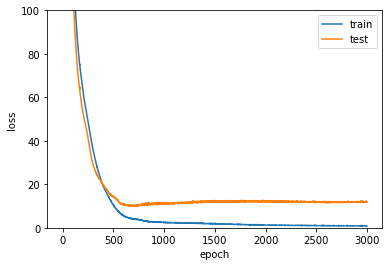

In [117]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel('loss')
plt.ylim(0, 100)
plt.legend(['train', 'test'])
plt.show()

## 딥러닝을 이용한 분류(Classification)

### Keras의 패션 MNIST 파일 불러들이기

In [72]:
from tensorflow import keras

In [73]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [74]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [75]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


#### 샘플그림 출력하기

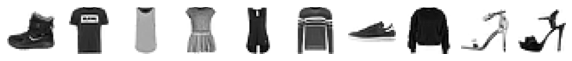

In [76]:
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(X_train[i], cmap="gray_r")
    axs[i].axis('off')
plt.show()

In [77]:
print([y_train[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [78]:
print(np.unique(y_train, return_counts=True))     # 0~9 까지 각각 6000개 포함됨

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


### feature matrix 데이터 전처리

In [79]:
X_scaled_train = X_train/255.0
X_scaled_train = X_scaled_train.reshape(-1, 28*28)

In [80]:
print(X_scaled_train.shape)

(60000, 784)


In [81]:
X_scaled_test = X_test/255.0
X_scaled_test = X_scaled_test.reshape(-1, 28*28)
print(X_scaled_test.shape)

(10000, 784)


### 로지스틱 회귀로 아이템 분류하기

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
model = LogisticRegression(max_iter=100)

In [84]:
model.fit(X_scaled_train, y_train)

C:\Users\jwyoon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [85]:
model.score(X_scaled_train, y_train)

0.86625

In [86]:
model.score(X_scaled_test, y_test)

0.8439

### 인공 신경망으로 분류하기

In [87]:
model = Sequential()
model.add(Dense(units=10, input_shape=(784,), activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [89]:
model.fit(X_scaled_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5828 - accuracy: 0.8017
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4650 - accuracy: 0.8424
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4453 - accuracy: 0.8490
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4330 - accuracy: 0.8539
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4257 - accuracy: 0.8566
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4216 - accuracy: 0.8583
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4168 - accuracy: 0.8593
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4140 - accuracy: 0.8601
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4126 - accuracy: 0.8615
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.411

In [90]:
model.evaluate(X_scaled_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3944 - accuracy: 0.8682


[0.39444881677627563, 0.868233323097229]

In [91]:
model.evaluate(X_scaled_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4550 - accuracy: 0.8467


[0.4549679756164551, 0.8467000126838684]

### 심층 신경망으로 성능 높이기

In [92]:
model= Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               78500     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.compile(loss="sparse_categorical_crossentropy", metrics='accuracy')
model.fit(X_scaled_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5430 - accuracy: 0.8132
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4007 - accuracy: 0.8547
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3667 - accuracy: 0.8661
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3444 - accuracy: 0.8757
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3267 - accuracy: 0.8813
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.8859
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3030 - accuracy: 0.8899
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2924 - accuracy: 0.8937
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2840 - accuracy: 0.8967
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.275

In [94]:
model.evaluate(X_scaled_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2813 - accuracy: 0.8971


[0.28130924701690674, 0.8970666527748108]

In [95]:
model.evaluate(X_scaled_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3661 - accuracy: 0.8699


[0.36609992384910583, 0.8698999881744385]